#TIME SERIES ANALYSIS

#Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

##DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP. You can get it in the github repo as well as here: http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/MTA_Fare.npy. 

It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


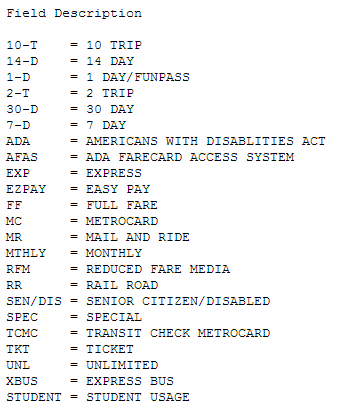

In [1]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

Each time series (per station, per ticket type) contains
the number of swipes per week for 194 weeks 
from 05/21/2010 to 02/21/2014. 

The data are available to you as a python data cube here:

you can load it as 

np.load(“MTA_Fare.npy") and 


you will end up with a python numpy array of 
shape (600,23,194)

##note that the missing values are inputted as -1

if you want to do things like algebra (summing time series for example) you need to take care of that! if you replace the -1 entries with NaN remember to use functions that can deal with nans:
np.nanmean
np.nansum...

#Task 1: 
##Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
##Identify it and figure out what it is due to.


#Task 2: 
##Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


#Task 3:
##Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


#EXTRA CREDIT: Cluster. 
##Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
##Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

##i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T

##removing empty light curves
tots = tots[tots.std(1)>0]

##with Kmeans you have to choose the number of clusters ahead km = 

KMeans(n_clusters=10)

##and standardize the lightcurves before clustering
vals = ((tots.T - tots.mean(1))/tots.std(1)).T

##then you can run:

km.fit(vals)

#HINTS: 

##When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average)


#Possibly useful functions

##I used a variety of functions, most of them you are familiar with already. here are a few that you may not have encountered yet which I used. 
##(But you do not have to use them! there are many ways to do things and you do not have to solve this problem like I did)

* the numpy function np.where() returns the index where a condition is true. it is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. if you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft  
     
     np.fft.rfft(mydata) 
     
     will return the fourier transform, but what you want is its absolute value: np.abs(). Then to get the x axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

     np.fft.rfftfreq(N, d) 
     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the Sample spacing, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1)


*  the np.array.flatten() and np.array.reshape() allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which i recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series)



In [2]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [3]:
MTA_Fare=np.load('MTA_Fare.npy')
MTA_Fare.shape

(600, 23, 194)

In [4]:
#trying to pring MTA_Fare
#MTA_Fare[::-1]

In [5]:
type(MTA_Fare)

numpy.ndarray

##Task 1 Event detection

In [6]:
mtaFare = np.load('MTA_Fare.npy')

In [7]:
#after reading the datacube you should see:
mtaFare.shape

(600, 23, 194)

In [8]:
#Checking the data type and will change it if required
mtaFare.dtype  # now is int
mtaFare = mtaFare.astype(float) #Converting to float

In [9]:
#Taken help from clasmate in this step #svarmit
posavg = np.mean(mtaFare[mtaFare > 0.0])
print posavg
mtaFare[mtaFare ==-1] = posavg

4550.41646255


In [10]:
datesRange = pd.date_range(start='05/21/2010', periods=194, freq='W')

ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

mtaFare.shape

(600, 23, 194)

yes 126


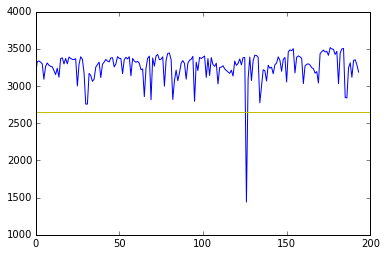

In [11]:
#Mean
meanMta = []
for i in range(194):
    meanMta.append(np.mean(mtaFare[:,:,i]))


threshold = [np.mean(meanMta) + 3*np.std(meanMta), 
              np.mean(meanMta) - 3*np.std(meanMta)]# to set the thresholdd
#print threshold

#Finding the week of occurence of the event
for i in range(194):
    if meanMta[i]<(threshold[1]):
        print 'yes', i 
#print meanMta
#Plot of time series with sd
plt.plot(range(194),meanMta)
plt.axhline(threshold[1], c='y')

In [12]:
mtaFare[mtaFare == -1] = np.nan
mtaFare.shape

(600, 23, 194)

(600, 194)
Events more then threshold are  (array([127, 130]),)


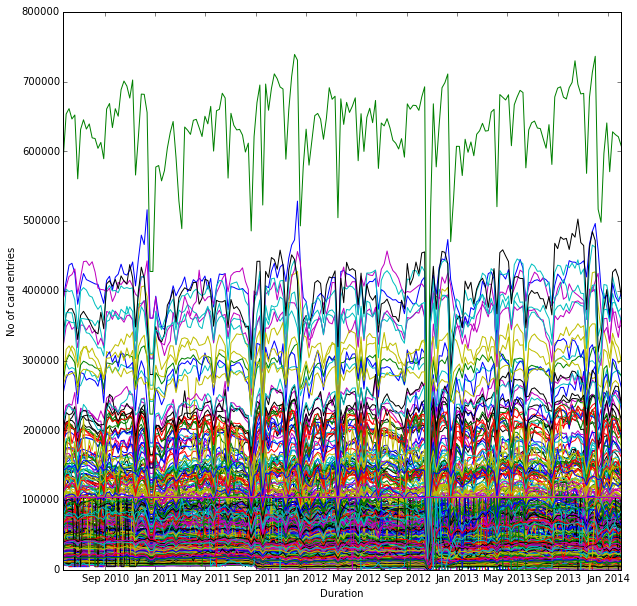

In [13]:



#Converting to float to perform arithmetic operations
mtaFare = mtaFare.astype(float)

#to have only stations 
stations = np.nansum(mtaFare, axis=1)
print stations.shape

plt.figure(figsize=(10, 10))
ax = pl.plot(datesRange, np.transpose(stations)) # transpose to get time on x axis
pl.xlabel('Duration')
pl.ylabel('No of card entries')
pl.colors()

#Threshold for stations
thresholds = [np.nanmean(stations, axis=1) + 3*np.nanstd(stations, axis=1), 
              np.nanmean(stations, axis=1) - 3*np.nanstd(stations, axis=1)]

#Checking for events
moreThreshold = [np.where(ts < thresholds[1][i]) for i,ts in enumerate(stations)]
print 'Events more then threshold are ', moreThreshold[0]

##Analysis
###The event is in october(2012) and that is the time when the Major hurricane 'Sandy' approached New York City.

##Task 2

Aim: To find non-stationary ridership types (increasing and decreasing) and the factor of change.
Concept: Stationarity of a time series. A time series is stationary if its mean and standard deviation over different intervals remain relatively the same.

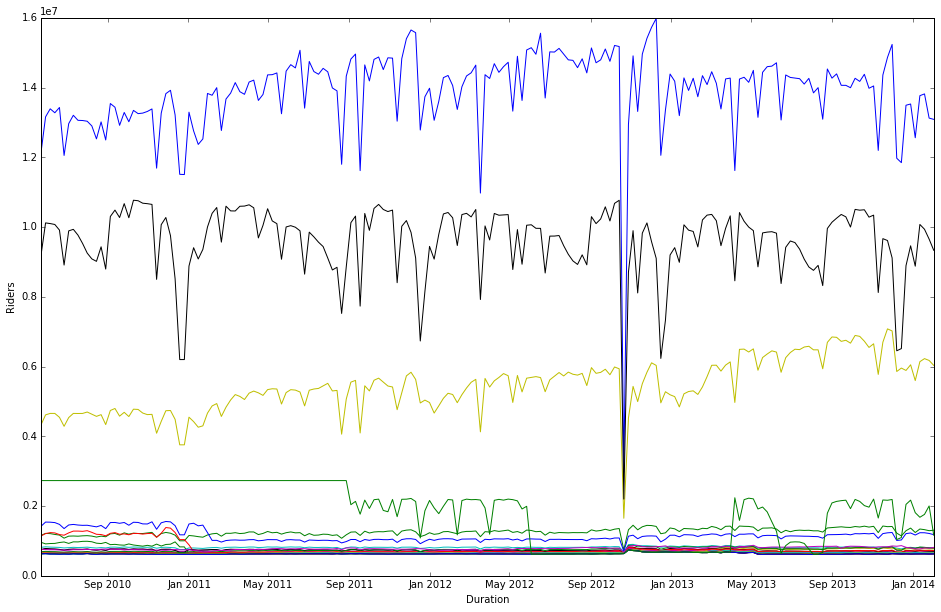

In [14]:
#To find riders and duration
mtaRiders = np.nansum(mtaFare, axis=0)

#Plotting the relation in riders and duration
plt.figure(figsize=(16, 10))
ax = pl.plot(datesRange, np.transpose(mtaRiders))
pl.ylabel('Riders')
pl.xlabel('Duration')


[ 0.98635366  0.89349432  0.98869526  1.01313274  0.99540319  0.7540438
  1.10392888  1.01400223  1.5225142   1.97578975  1.00867926  0.96266716
  0.81055759  1.08025362  1.25196299  0.86814576  0.9142608   0.95083229
  0.9180961   0.99585944  0.99860817  0.99589543  1.61020926]


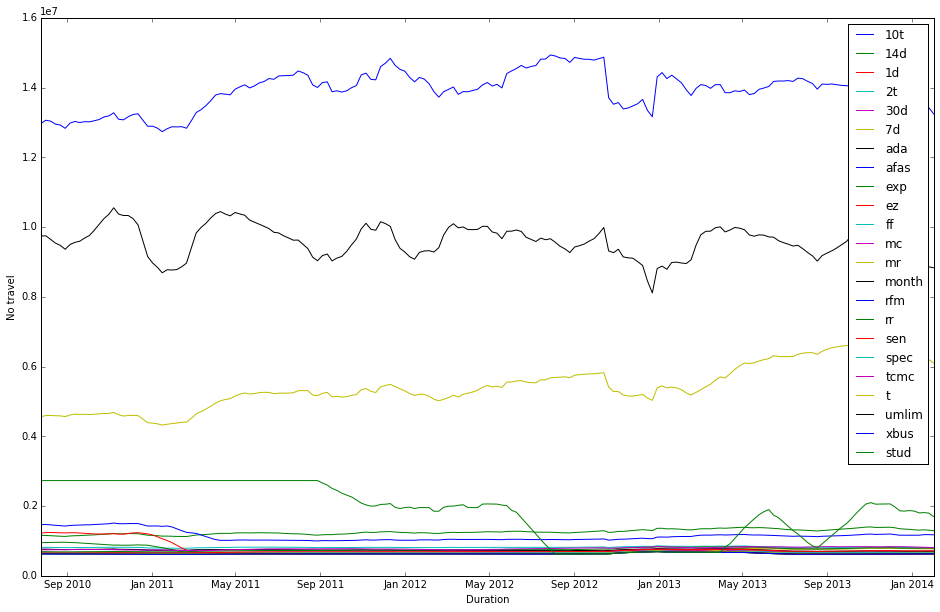

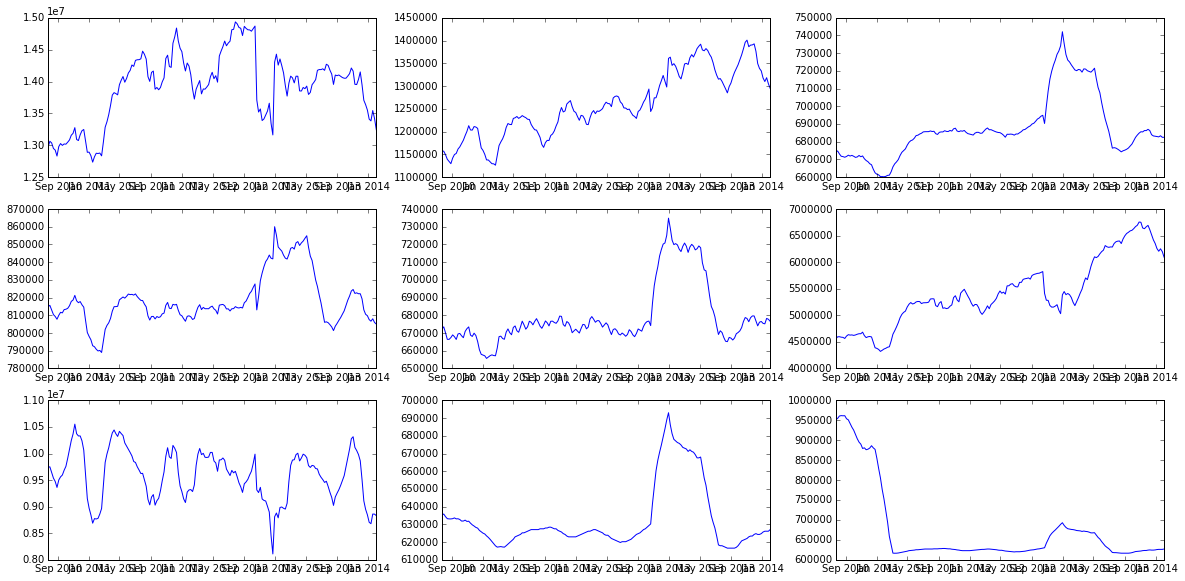

In [15]:
#Rolling mean and its ratio(Took help from classmate) and plotting
plt.figure(figsize=(16, 10))
type_roll = pd.rolling_mean(np.transpose(mtaRiders), 10)
ax = pl.plot(datesRange, type_roll)
pl.ylabel('No travel')
pl.xlabel('Duration')
pl.legend(ridetype)



type_roll_ratio = type_roll[10,:]/type_roll[193,:]
plt.figure(figsize=(20, 20))
n = 1; j = 0
for i in type_roll_ratio:
    if i>0.9 and i<1.1:
        continue
        j += 1
    else:
        pl.subplot(6, 3, n)
        ax = pl.plot(datesRange, type_roll[:, j])
        n += 1; j += 1
print type_roll_ratio


###Analysis.


In [16]:
for i in range(len(ridetype)):
    print '%10s rider type usage is increasing at ratio of %s' %(ridetype[i],type_roll_ratio[i])

       10t rider type usage is increasing at ratio of 0.986353657196
       14d rider type usage is increasing at ratio of 0.893494323517
        1d rider type usage is increasing at ratio of 0.988695263941
        2t rider type usage is increasing at ratio of 1.01313274098
       30d rider type usage is increasing at ratio of 0.995403194767
        7d rider type usage is increasing at ratio of 0.754043798998
       ada rider type usage is increasing at ratio of 1.1039288838
      afas rider type usage is increasing at ratio of 1.0140022265
       exp rider type usage is increasing at ratio of 1.52251419742
        ez rider type usage is increasing at ratio of 1.9757897485
        ff rider type usage is increasing at ratio of 1.00867926381
        mc rider type usage is increasing at ratio of 0.962667164198
        mr rider type usage is increasing at ratio of 0.810557588995
     month rider type usage is increasing at ratio of 1.08025361599
       rfm rider type usage is increasing at

###From this and the graphs above  analysis we can find that some of the types' popularity is increasing with very high rate and some are stable(example 7d,14d,mc) 

##Task 3

###Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

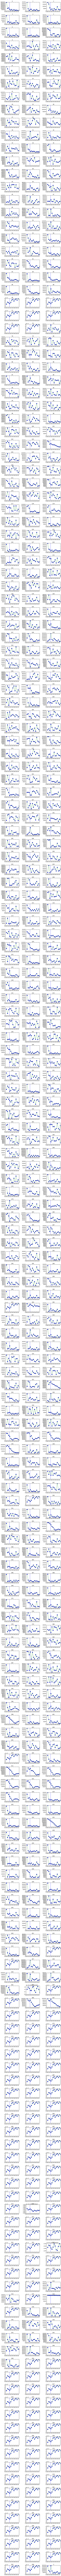

In [24]:
f = np.abs(np.fft.rfft(stations))
f.shape
ffreq = np.fft.rfftfreq(194, d=1.0)
ffreq.shape

fig = plt.figure(figsize=(10,400))
mtastats = pd.DataFrame(stations)


for i in range(600):
    ax = fig.add_subplot(200,3,i)
    f = np.abs(np.fft.rfft(mtastats.loc[i,:]))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], 'o', ms = 8)
    ax.set_title("%i" %(i-1))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], '-')
    ax.set_xlim(0,1.0/15)
    plt.axvline(1.0/52)
    pl.subplots_adjust(wspace=.5, hspace=.5, left=.125, right=.9, top=1, bottom=.1)
   

In [17]:
stationNames = {}
for i in range(600):
    stationNames[i] = np.abs(np.fft.rfft(stations[i-1])[4])


import operator
sorted_periods = sorted(stationNames.items(), key=operator.itemgetter(1))

print("Top 4 stations")
print(sorted_periods[596:600])
#print pd.DataFrame(sorted_periods).sort_values('power',ascending=0).head(4)

Top 4 stations
[(1, 2871242.373376599), (151, 2993544.6333606942), (195, 3011717.8965139226), (459, 4493755.4525323529)]


### So the stations 1, 195,151,328 have the most prominent trend.

##EXTRA CREDIT: Cluster

##NOTE ON THE TREND DETECTION:
###you should find the ride type that has the steepest increase, and the steepest decrease. notice: we are looking for something that has a more or less constant trend

###to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

###you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the flux near the beginning to the flux near the end of the time series.

###notice that you should inspect the time series, either algorithmically or by eye, to ensure you see a trend, and not just changing structure.


###below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

std: 153167.095823 
flux ratio beginning to end 1.53960256599
std: 33307.6081244 
flux ratio beginning to end 0.378670623705


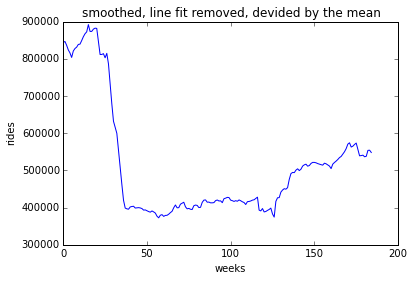

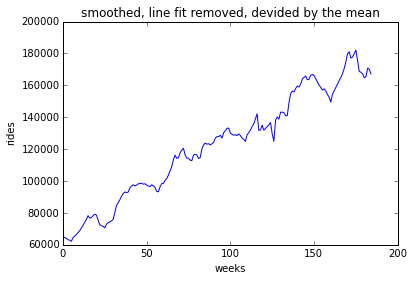

##to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
##an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

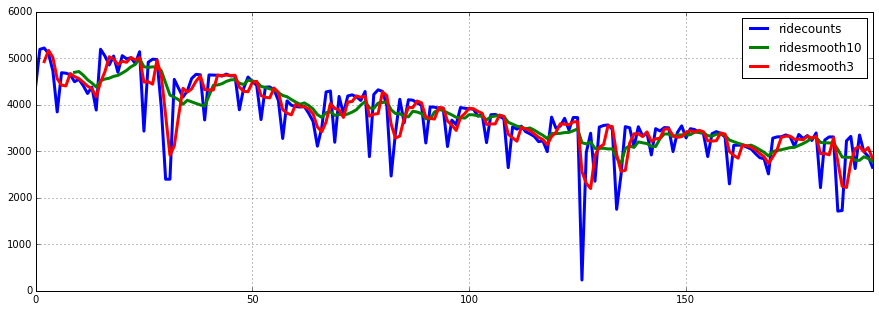

In [14]:
#here is an example of an individual time series that shows a trend, 
#after smoothing by 3 and 10 weeks

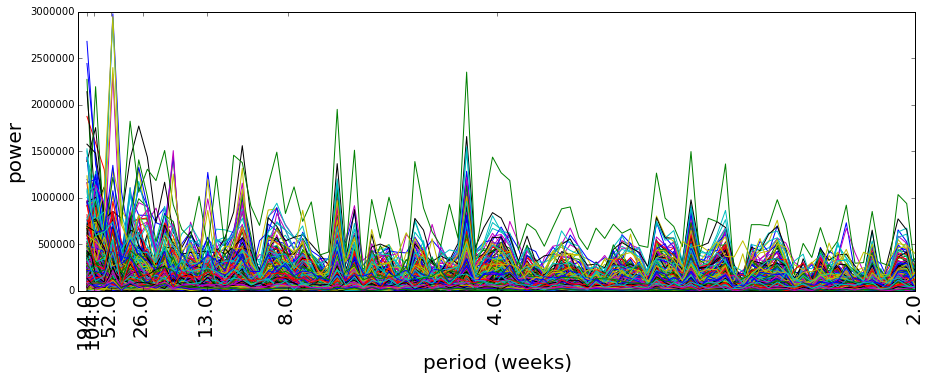

In [51]:
#this is a "power spectrum": the plot of the absolute value of the fourier transform. 
#I changed the xtick labels from frequecy (1/week) to period (in weeks)
#to facilitate the visual identification of the 1-year period peak
#(notice however that np.fft.rfftfreq(N, d)  returns frequency)

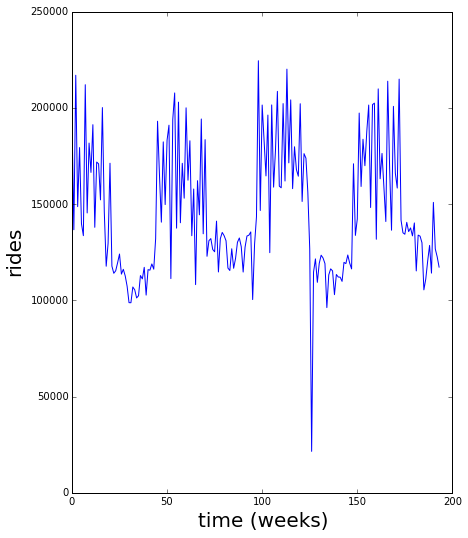

In [63]:
#and here is one of he periodic time series you should find by identifying the time series with the most power 
#at 1/52 weeks frequency in fourier space